In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df = application_df.drop(['EIN', 'NAME'], axis=1)

In [5]:
#name of columns after dropping 
df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [6]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_counts = df['APPLICATION_TYPE'].value_counts()
print(application_counts)

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


In [7]:
# Choose a cutoff value and create a list of application types to be replaced
cutoff = 528 
application_types_to_replace = list(application_counts[application_counts < cutoff].index)

# Replace in dataframe
for app in application_types_to_replace:
    df['APPLICATION_TYPE'] = df['APPLICATION_TYPE'].replace(app, "Other")

# Check to make sure replacement was successful
print(df['APPLICATION_TYPE'].value_counts())

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64


In [8]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_counts = df['CLASSIFICATION'].value_counts()
print(classification_counts)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64


In [9]:
# Choose a cutoff value for low-frequency classifications
cutoff = 100
classifications_to_replace = list(classification_counts[classification_counts < cutoff].index)

# Replace low-frequency CLASSIFICATION values with "Other"
df['CLASSIFICATION'] = df['CLASSIFICATION'].replace(classifications_to_replace, "Other")

# Check to make sure replacement was successful
print(df['CLASSIFICATION'].value_counts())

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: count, dtype: int64


In [33]:
# Convert categorical data to numeric with pd.get_dummies
df = pd.get_dummies(df, drop_first=True)
# Display the first few rows to verify the conversion
df.head()


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,108590,1,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,1,5000,0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,6692,1,False,False,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
4,1,142590,1,False,False,True,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False


In [11]:
# Split the data into features (X) and target (y)
y = df['IS_SUCCESSFUL']
X = df.drop(columns=['IS_SUCCESSFUL'])
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Create a StandardScaler instance and scale the data
scaler = StandardScaler()
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Verify the preprocessing steps
print(f"Shape of X_train_scaled: {X_train_scaled.shape}")

print(f"Shape of X_test_scaled: {X_test_scaled.shape}")

Shape of X_train_scaled: (27439, 42)
Shape of X_test_scaled: (6860, 42)


In [13]:
# Adding more hidden layers or neurons
nn = tf.keras.models.Sequential()

# First hidden layer with more neurons
nn.add(tf.keras.layers.Dense(units=128, input_dim=X_train_scaled.shape[1], activation='relu'))

# Additional hidden layer
nn.add(tf.keras.layers.Dense(units=64, activation='relu'))

# Second hidden layer with more neurons
nn.add(tf.keras.layers.Dense(units=32, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

c:\Users\Anupreet Virk\.anaconda\New folder\New folder\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
#Using Dropout layers to prevent overfitting

nn.add(tf.keras.layers.Dropout(0.2))  # Dropout rate of 20%

In [15]:
# Using Batch Normalization
nn.add(tf.keras.layers.BatchNormalization())

In [16]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001) 

In [17]:
#Using different activation functions
from tensorflow.keras.layers import LeakyReLU

nn.add(tf.keras.layers.Dense(units=128, input_dim=X_train_scaled.shape[1]))
nn.add(LeakyReLU(alpha=0.01))  # Using LeakyReLU

c:\Users\Anupreet Virk\.anaconda\New folder\New folder\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [26]:
nn = tf.keras.models.Sequential()
# First hidden layer
nn.add(tf.keras.layers.Dense(units=256, input_dim=X_train_scaled.shape[1]))
nn.add(tf.keras.layers.LeakyReLU(alpha=0.1))  
nn.add(tf.keras.layers.BatchNormalization())  
nn.add(tf.keras.layers.Dropout(0.3))  

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=128))
nn.add(tf.keras.layers.LeakyReLU(alpha=0.1))
nn.add(tf.keras.layers.BatchNormalization())
nn.add(tf.keras.layers.Dropout(0.3))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=64))
nn.add(tf.keras.layers.LeakyReLU(alpha=0.1))
nn.add(tf.keras.layers.BatchNormalization())
nn.add(tf.keras.layers.Dropout(0.2))  

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Model summary
nn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 256)            │        11,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,017 (211.00 KB)

 Trainable params: 53,121 (207.50 KB)

 Non-trainable params: 896 (3.50 KB)

In [27]:
# Compile the model
optimizer = Adam(learning_rate=0.0005)  
nn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
#Train the optimized model:
history = nn.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6412 - loss: 0.7112 - val_accuracy: 0.7310 - val_loss: 0.5602
Epoch 2/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7030 - loss: 0.6022 - val_accuracy: 0.7376 - val_loss: 0.5536
Epoch 3/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7070 - loss: 0.5855 - val_accuracy: 0.7360 - val_loss: 0.5512
Epoch 4/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7162 - loss: 0.5735 - val_accuracy: 0.7374 - val_loss: 0.5496
Epoch 5/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7236 - loss: 0.5668 - val_accuracy: 0.7362 - val_loss: 0.5514
Epoch 6/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7212 - loss: 0.5653 - val_accuracy: 0.7376 - val_loss: 0.5482
Epoch 7/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7221 - loss: 0.5651 - val_accuracy: 0.7382 - val_loss: 0.5462
Epoch 8/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7192 - loss: 0.5690 - val_accu

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - 2ms/step - accuracy: 0.7274 - loss: 0.5519
Loss: 0.5519232749938965, Accuracy: 0.7274052500724792


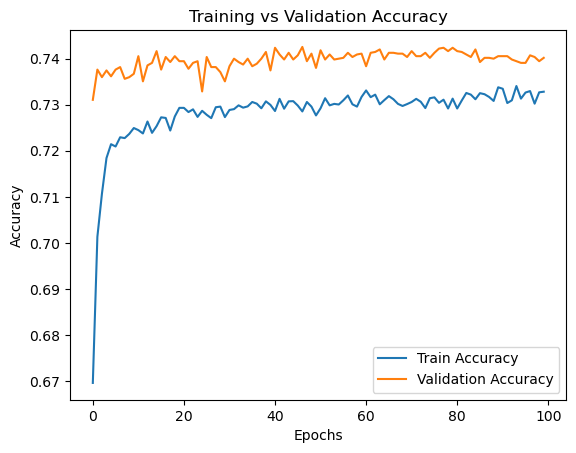

In [30]:
#  code for plotting training vs validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Alphabetcharity_accuracy_plot.png')  # Save the plot
plt.show()

In [31]:
#Save the model
nn.save('AlphabetSoupCharity_Optimization.h5')